### Fast Fourier Transforms(FFT): Overview



### What is [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)?

* FFT is a discrete Fourier transform algorithm that samples a signal over a period of time and divides it into its frequency components. 
* Fourier analysis converts a dignal from its orginal domain into a frequency domain representation. FFT rapidly computes the transformation by factoring the descrete Fourier matrix into a product of sparse factors.
* Were first discussed by cooley and Tukey in 1965
* Gauss had already discussed the critical factorization step as early as [1805](http://mathworld.wolfram.com/FastFourierTransform.html)

## Finding the Recipe!
* Watch this [video](https://www.youtube.com/watch?v=Qm84XIoTy0s)
* [Here's](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/) a great website that breaks down what the Fourier transform is and how it is used! 
* A Fourier Series is the summation of sine waves. A Fourier series can be used to represent any periodic signal. 
* Given a complex wave, a combination of many sine waves, (A Fourier Series), we can preform a Fourier Trandform to find the ingredients, used to create such a complex wave
* We take the signal which shows us the power over a period of time, and we are transforming it into individual components which shows us the power of each wavelength, or frequency.
* The Fourier Transform is a set of complicated equations.
* The foureir Transform further proves how the Fourier series is a good approximation of a naturally occuring signal. 

## Real Life Applications 
*Where is the Fourier Transform used in the real world?*
* sound wave analysis
* image data analysis
* digital image processing
* computer -assisted image processing
* Edge detection
    (when you take a picture and you want to outline a person or something and transfer it to another image)  

Make sure your kernel is set to "Python 3 (Ubuntu Linux)" before proceeding.

## Functions used for FFT in Python:
* see [scipy.fftpack](https://docs.scipy.org/doc/scipy/reference/fftpack.html)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# One dimensional discrete Fourier Transform

Here is an example of fft and ifft

In [25]:
from scipy.fftpack import fft, ifft #Return discrete inverse Fourier transform of real or complex sequence.

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x) # fft Return discrete Fourier transform of real or complex sequence. 
y

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [26]:
yinv = ifft(y) #Return discrete inverse Fourier transform of real or complex sequence.
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

fftfreq returns sample frequency points.

In [27]:
from scipy.fftpack import fftfreq

freq = fftfreq(8, 0.125)
freq


array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

Here we plot the fast fourier transform of the sum of two sine waves. 

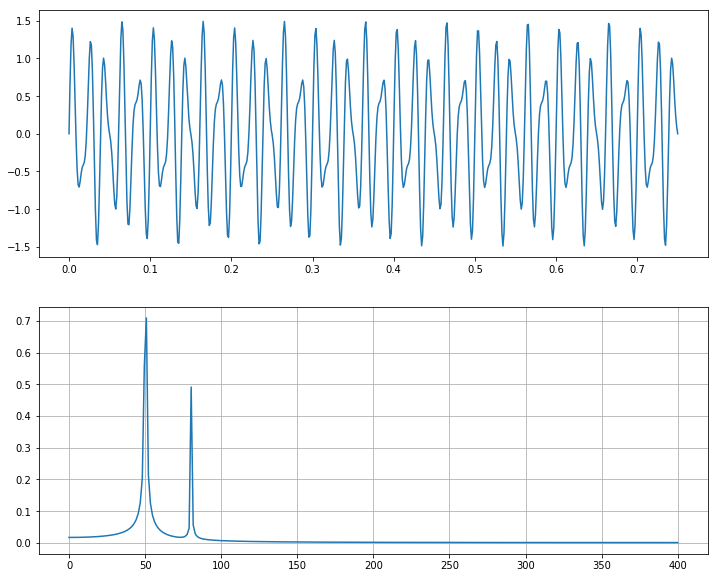

In [116]:
from scipy.fftpack import fft

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0                           ## Define a sampling frequency

# "Spatial" coordinates 
x = np.linspace(0.0, N*T, N)              ## Range given by number of points times spatial sampling frequency

# "Frequency" coordinates
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)  ## Range given by inverse of the spatial sampling frequency


# Function that we want to tranform
a = np.sin(50.0 * 2.0*np.pi*x)
b = 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = a+b

# Fast Fourier Transform
yf = fft(y)

# Plot both the function and the FFT
fig,axs = plt.subplots(ncols=1, nrows=2, figsize=(12,10))

axs[0].plot(x,y)                          ## This is the function itself
axs[1].plot(xf, 2./N * np.abs(yf[0:N//2]))       ## This is its tranform
plt.grid()
plt.show()

## Two dimensional Fourier Transform


The following example demonstrates a 2-dimensional inverse fast fourier transform.

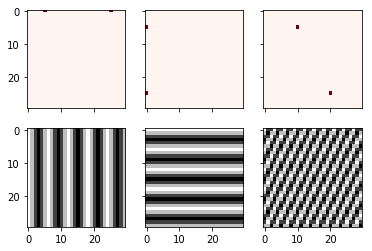

In [30]:
from scipy.fftpack import ifftn
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

2-D Fourier Transforms are used in image processing. They are used to see peaks of spacial frequencies of repeated texture in images such as finger prints!

### Digital Image Processing: Making an image blurry using FFT

Here is a "clear" example on how 2-D FFT applictions are applied to images. 

In [19]:
from scipy import fftpack

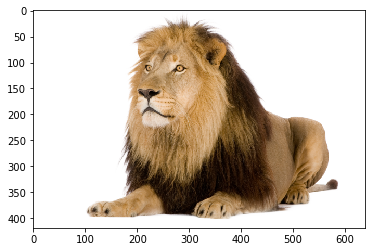

In [32]:
img = plt.imread('lion.png')
plt.figure()
plt.imshow(img)

In [33]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]


Padded fourier transform, with the same shape as the image
We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT

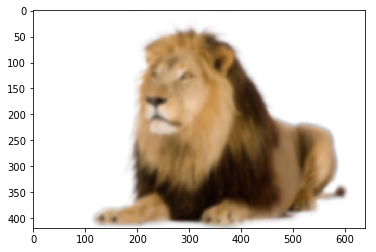

In [34]:
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

img_ft = fftpack.fft2(img, axes=(0, 1))

img2_ft = kernel_ft[:, :, np.newaxis] * img_ft # the 'newaxis' is to match to color direction
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

img2 = np.clip(img2, 0, 1) # clip values to range

# plot 
plt.figure()
plt.imshow(img2)


## Examples using wav files

Downloaded wav files from [here](http://www.wavsource.com/sfx/sfx3.htm).
More websites available to get wav files [here](https://www.thefreesite.com/Free_Sounds/Free_WAVs/)
Also [here](https://www.audiocheck.net/audiofrequencysignalgenerator_sinetone.php)

Think about a mechanic who takes a sound sample of an engine and then relies on a machine to analyze that sample, looking for potential engine problems. The diagnostic can find some problems and visual inspection can find others, but sometimes the sound of an engine reveals issues that you can’t find in any other way.

In [117]:
from scipy.io import wavfile as wav

What does this do? What are the blue lines at the bottom?

According to [the FFT documentation from `numpy`](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.fft.html):

> If `A = fft(a, n)`, then `A[0]` contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then `A[1:n/2]` contains the positive-frequency terms, and `A[n/2+1:]` contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points, `A[n/2]` represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, `A[(n-1)/2]` contains the largest positive frequency, while `A[(n+1)/2]` contains the largest negative frequency. The routine `np.fft.fftfreq(n)` returns an array giving the frequencies of corresponding elements in the output. The routine `np.fft.fftshift(A)` shifts transforms and their frequencies to put the zero-frequency components in the middle, and `np.fft.ifftshift(A)` undoes that shift.

> When the input a is a time-domain signal and `A = fft(a)`, `np.abs(A)` is its amplitude spectrum and `np.abs(A)**2` is its power spectrum. The phase spectrum is obtained by `np.angle(A)`.


Let's read in the waveforms from the `WAV` files:

In [168]:
rate_ocean, data_ocean = wav.read('ocean.wav')
#rate_phone, data_phone = wav.read('sin_1kHz.wav')
rate_phone, data_phone = wav.read('Tuning-fork-mod.wav')

print("Sampling rate ocean: " + str(rate_ocean) + " [samples/s]")
print("Sampling rate phone: " + str(rate_phone) + " [samples/s]")

Sampling rate ocean: 11025 [samples/s]
Sampling rate phone: 44100 [samples/s]


Compute the FFT 

In [169]:
# Compute the fast Fourier transforms of the waveforms
fft_out_ocean = fft(data_ocean)
fft_out_phone = fft(data_phone)

# Figure out how many samples total we have
len_ocean = len(fft_out_ocean)
len_phone = len(fft_out_phone)

# Amplitudes
amp_ocean = 2./len_ocean * np.abs(fft_out_ocean[0:len_ocean/2])
amp_phone = 2./len_phone * np.abs(fft_out_phone[0:len_phone/2])

Text(0,0.5,'Amplitude (log)')

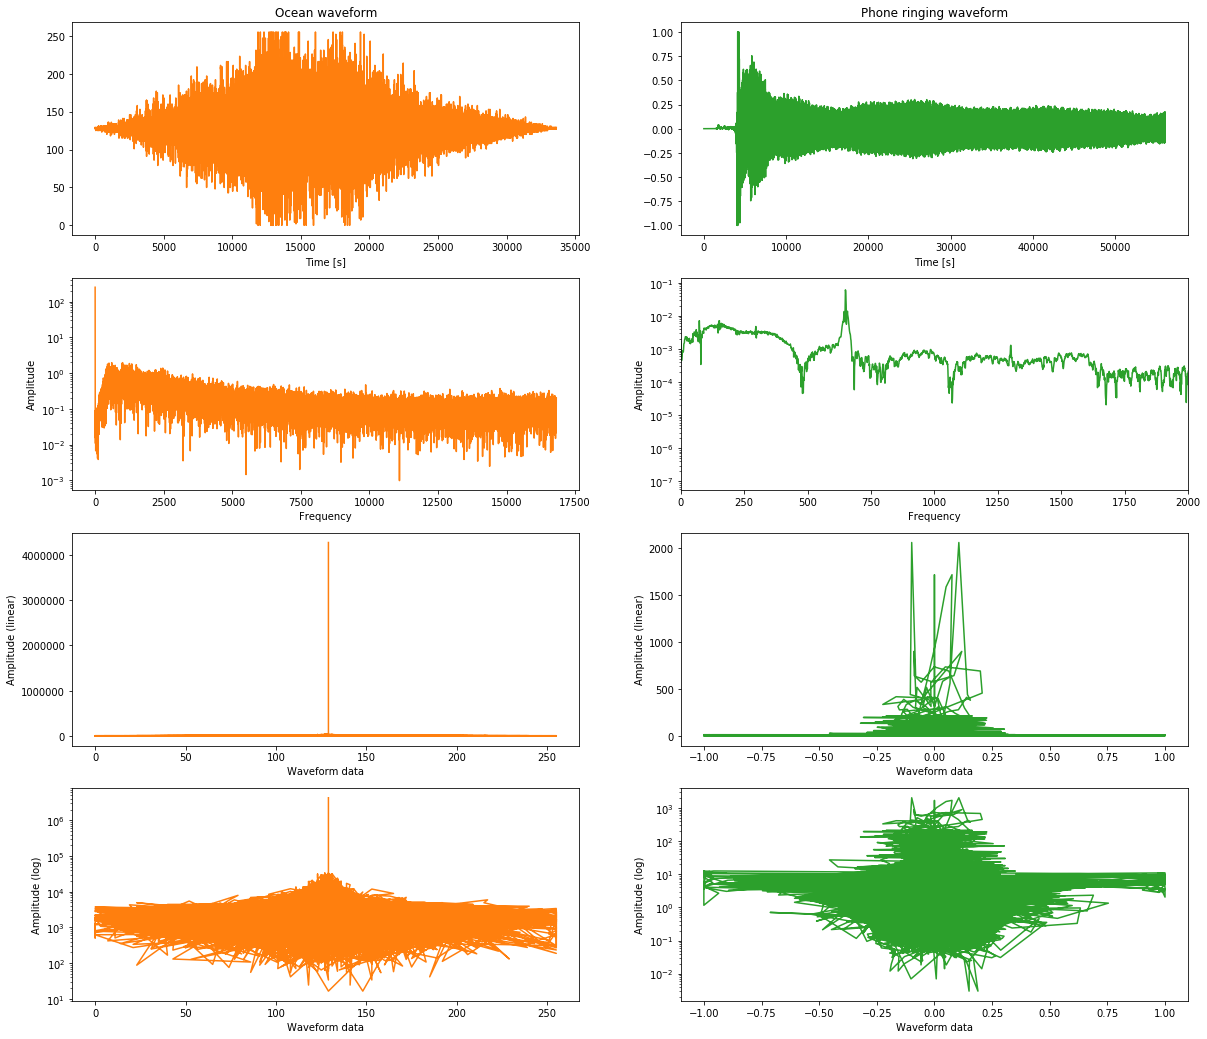

In [170]:
fig,axes = plt.subplots(ncols=2, nrows=4, figsize=(20,18))

colorA = 'C1'
colorB = 'C2'

# Plot the waveforms themselves
axes[0, 0].plot(data_ocean, color=colorA)
axes[0, 0].set_title("Ocean waveform")
axes[0, 0].set_xlabel("Time [s]")

axes[0, 1].plot(data_phone, color=colorB)
axes[0, 1].set_title("Phone ringing waveform")
axes[0, 1].set_xlabel("Time [s]")
#axes[0, 1].set_xlim(0, 11000)

# Plot the amplitude of the Fourier components
axes[1, 0].semilogy(amp_ocean, color=colorA)
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_ylabel("Amplitude")

axes[1, 1].semilogy(amp_phone, color=colorB)
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].set_ylabel("Amplitude")
axes[1, 1].set_xlim(0, 2000)

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 0].plot(data_ocean, np.abs(fft_out_ocean), color=colorA)
axes[2, 0].set_xlabel("Waveform data")
axes[2, 0].set_ylabel("Amplitude (linear)")

axes[3, 0].semilogy(data_ocean, np.abs(fft_out_ocean), color=colorA)
axes[3, 0].set_xlabel("Waveform data")
axes[3, 0].set_ylabel("Amplitude (log)")

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 1].plot(data_phone, np.abs(fft_out_phone), color=colorB)
axes[2, 1].set_xlabel("Waveform data")
axes[2, 1].set_ylabel("Amplitude (linear)")

axes[3, 1].semilogy(data_phone, np.abs(fft_out_phone), color=colorB)
axes[3, 1].set_xlabel("Waveform data")
axes[3, 1].set_ylabel("Amplitude (log)")


#plt.tight_layout()

This code reads a .wav file and solves the Fourier transform! 
The output displays the strongest detected frequencies over time. The blue lines at the bottom are the extra noise of the signal. 

Note: I found that testing this with .wav files larger than 24 kb caused a bit of trouble when reading the file. 

/usr/local/lib/python3.5/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


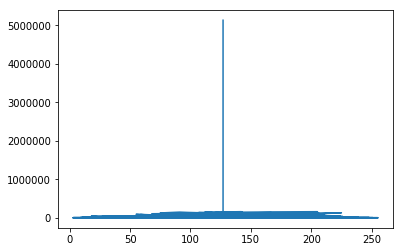

In [6]:
rate, data = wav.read('Movie-06.wav')
fft_out = fft(data)
plt.plot(data, np.abs(fft_out))
plt.show()

## Exercises

###### 1. Plot the following FFT where $y = sin(2 {\pi} t)$, the sampling rate is 150 and the frequuency signal is 5.

###### 2a. Find and download a .wav file and add it to this folder. 

###### 2b. Plot the fft of your own sound 

###### 2c. What does your plot show you? How large was your wav file? When is this technique used in real wolrd applications?

#### Solutions:

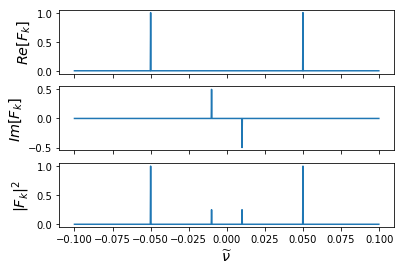

In [24]:
#Solution 1
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
n = 1000 # Number of data points
dx = 5.0 # Sampling period (in meters)
x = dx*np.arange(0,n) # x coordinates
w1 = 100.0 # wavelength (meters)
w2 = 20.0 # wavelength (meters)
fx = np.sin(2*np.pi*x/w1) + 2*np.cos(2*np.pi*x/w2) # signal
Fk = fft.fft(fx)/n # Fourier coefficients (divided by n)
nu = fft.fftfreq(n,dx) # Natural frequencies
Fk = fft.fftshift(Fk) # Shift zero freq to center
nu = fft.fftshift(nu) # Shift zero freq to center
f, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(nu, np.real(Fk)) # Plot Cosine terms
ax[0].set_ylabel(r'$Re[F_k]$', size = 'x-large')
ax[1].plot(nu, np.imag(Fk)) # Plot Sine terms
ax[1].set_ylabel(r'$Im[F_k]$', size = 'x-large')
ax[2].plot(nu, np.absolute(Fk)**2) # Plot spectral power
ax[2].set_ylabel(r'$\vert F_k \vert ^2$', size = 'x-large')
ax[2].set_xlabel(r'$\widetilde{\nu}$', size = 'x-large')
plt.show()

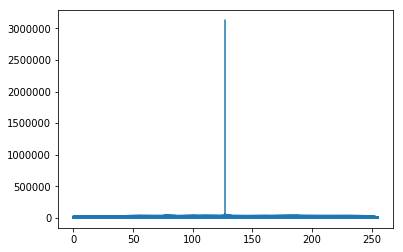

In [26]:
#solution 2

#2a. downloaded bowling.wav

#2b.
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('bowling.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

#2c
#The plot displays the most prominent frequency in the file. This application of fft is used in sound editing and audio engineerine. One can pinpoint the highest frequency and cancel out the whitenoise. The white noise can be extracted to create a smaller file, such as an MP3.

Resources used:
* https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
* https://www.youtube.com/watch?v=Qm84XIoTy0s
* https://en.wikipedia.org/wiki/Fourier_series#Hilbert_space_interpretation
* https://math.stackexchange.com/questions/1002/fourier-transform-for-dummies
                